In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [27]:
df=pd.read_csv("Credit_default_modified.csv")

In [28]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [29]:
df["ID"]=np.arange(1,30001,1)

In [32]:
cols=df.columns.to_list()
cols = cols[-1:] + cols[:-1]
df=df[cols]

In [33]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,PAY_TO_BAL_RATIO
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.089434
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.292791
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0.108388
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0.036259
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,0.540054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,725349.0,42550.0,0.058661
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,21182.0,14490.0,0.684071
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,70496.0,31300.0,0.443997
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,266611.0,147181.0,0.552044


In [38]:
#df.describe().T

In [50]:
df1=df.copy()
df1.drop('ID',axis=1,inplace=True)

In [51]:
#changing column data types
for col in ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    df1[col]=df1[col].astype('category')

In [52]:
df1.dtypes

LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_1                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default.payment.next.month       int64
TOTAL_BILL                     float64
TOTAL_PAY                

# RANDOM FOREST

In [85]:
df_rfc=df1.copy()

In [86]:
X=df_rfc.drop('default.payment.next.month',axis=1)
y=df_rfc['default.payment.next.month']

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score



# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8155
Precision: 0.6362
F1 Score: 0.4650
Recall: 0.3663
AUC: 0.7603


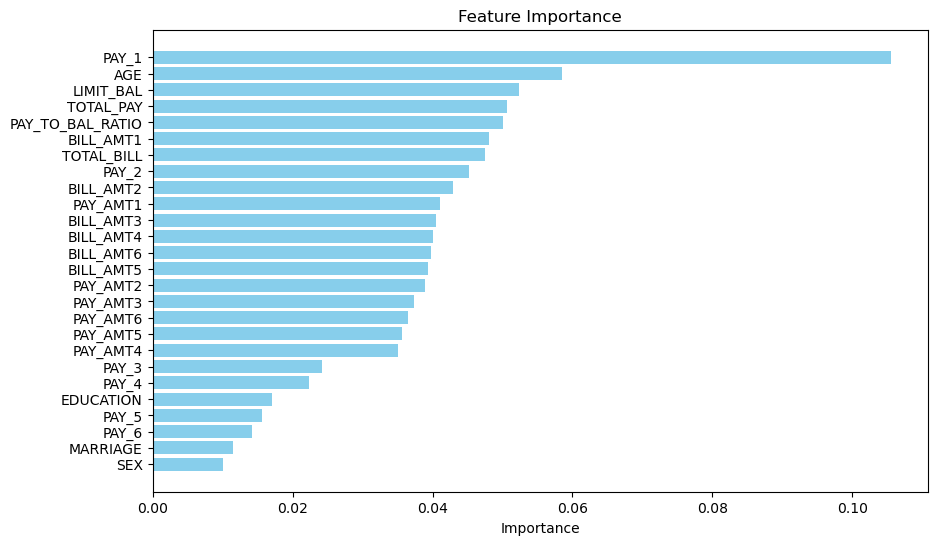

In [88]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [130]:
#importance_df.Feature

In [127]:
col=["PAY_1", "AGE", "LIMIT_BAL", "TOTAL_PAY", "PAY_TO_BAL_RATIO", "BILL_AMT1", "TOTAL_BILL", "PAY_2",
"BILL_AMT2", "PAY_AMT1", "BILL_AMT3", "BILL_AMT4", "BILL_AMT6", "BILL_AMT5", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4"]
X_new=X[col]

In [128]:
# Split data into train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Define and fit the Random Forest Classifier
model_new = RandomForestClassifier(random_state=42)
model_new.fit(X_train_1, y_train_1)
y_pred_new=model_new.predict(X_test_1)

In [129]:
# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
auc = roc_auc_score(y_test, model_new.predict_proba(X_test_1)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.8143
Precision: 0.6361
F1 Score: 0.4550
Recall: 0.3542
AUC: 0.7543


# RANDOM FOREST WITH SMOTE

In [64]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,5,6,7,8,9,10])
X_smotenc, y_smotenc = sm.fit_resample(X_train, y_train)

In [67]:
# Define and fit the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_smotenc, y_smotenc)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7805
Precision: 0.4984
F1 Score: 0.4837
Recall: 0.4699
AUC: 0.7459


# RANDOM FOREST WITH OVERSAMPLING

In [82]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [83]:
model = RandomForestClassifier(random_state=42)
model.fit(X_ros, y_ros)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8073
Precision: 0.5803
F1 Score: 0.4952
Recall: 0.4318
AUC: 0.7561


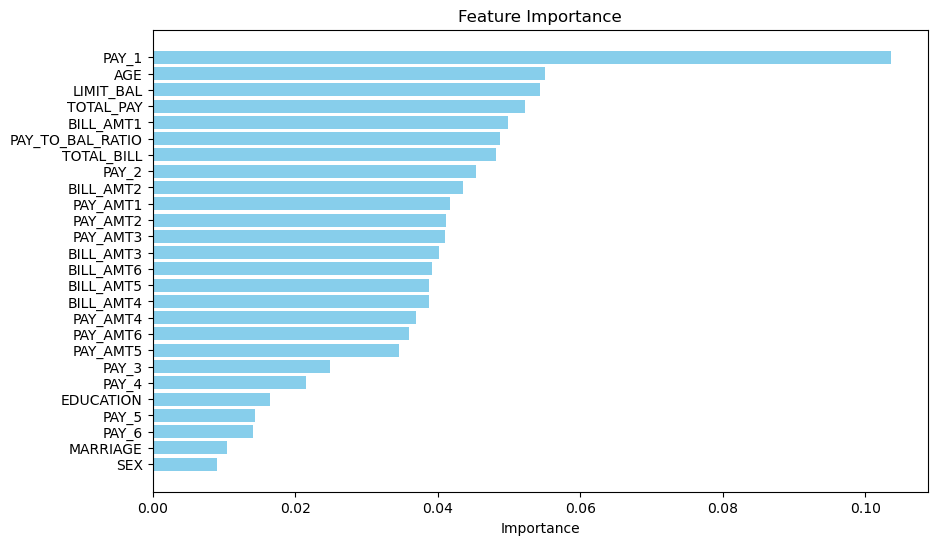

In [84]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#  RANDOM FOREST WITH UNDERSAMPLING

In [80]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Define and fit the Random Forest Classifier
model = RandomForestClassifier(random_state=42,n_estimators=300)
model.fit(X_rus, y_rus)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7400
Precision: 0.4353
F1 Score: 0.5158
Recall: 0.6329
AUC: 0.7665


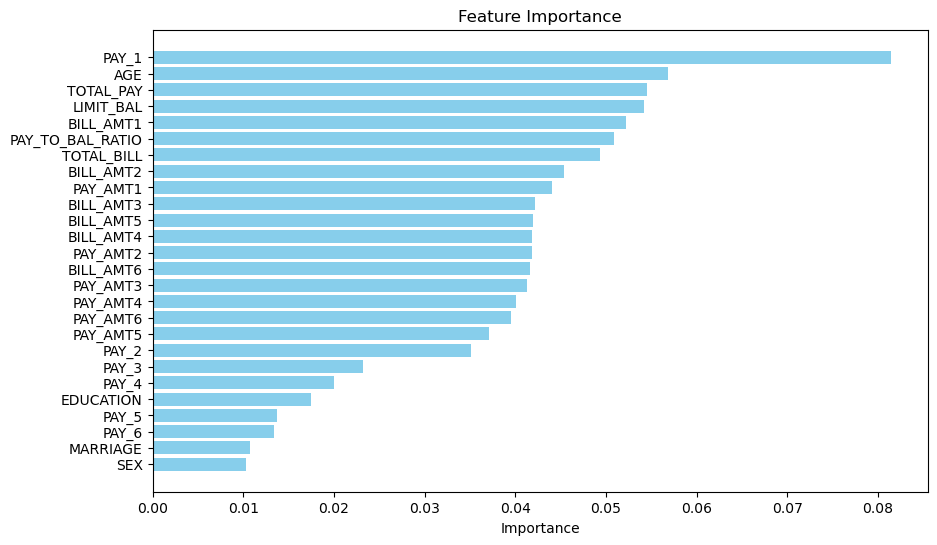

In [81]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()